# Domácí úkol
## Část 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

**Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže pomocí `%timeit` a různých výsledných velikostí matic (např. 101, 1001, 10001).**

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n // 2 + 1  # počáteční pozice: střed matice
    pos_col = n // 2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_col += 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj

In [13]:
A = integer_spiral(7)
print(A)

[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]


In [14]:
def integer_spiral_numpy(n):
    A = np.zeros((n + 2, n + 2))

    max_num = n**2
    middle = int(n / 2) + 1

    A[middle, middle] = 1

    for i in range(int(n / 2), 0, -1):
        edge = 2 * i

        # Bottom (grow ->)
        max = max_num
        min = max- edge
        A[middle + i, middle - i + 1:middle + i + 1] = np.arange(min+1, max+1, 1)

        # Left (grow ->)
        max= min
        min = max- edge
        A[middle - i + 1:middle + i + 1, middle - i] = np.arange(min+1, max+1, 1)

        # Top (grow <-)
        max= min
        min = max- edge
        A[middle - i, middle - i:middle + i] = np.arange(max, min, -1)

        # Right (grow <-)
        max= min
        min = max- edge
        A[middle - i:middle + i, middle + i] = np.arange(max, min, -1)

        max_num = min

    return A[1:-1, 1:-1]


A = integer_spiral_numpy(7)
print(A)

[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]


In [15]:
def test_speed_spiral_functions(n):
    print("_"*60)
    print(f"For a matrix size of {n}x{n}:")
    %timeit integer_spiral_numpy(n)
    print("Time taken for the function with NumPy.")

    %timeit integer_spiral(n)
    print("Time taken for the primitive function.")
    print("_"*60)


test_speed_spiral_functions(101)
test_speed_spiral_functions(1001)
test_speed_spiral_functions(10001)

____________________________________________________________
For a matrix size of 101x101:


229 μs ± 13.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Time taken for the function with NumPy.
5.22 ms ± 485 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Time taken for the primitive function.
____________________________________________________________
____________________________________________________________
For a matrix size of 1001x1001:
4.32 ms ± 139 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Time taken for the function with NumPy.
531 ms ± 22.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Time taken for the primitive function.
____________________________________________________________
____________________________________________________________
For a matrix size of 10001x10001:
675 ms ± 72 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Time taken for the function with NumPy.
56.9 s ± 1.05 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
Time taken for the primitive function.
_____________________________________

In [ ]:
#!pip install h5py -U

In [16]:
import h5py

In [17]:
spiral = integer_spiral_numpy(23)

In [18]:
with h5py.File("spiral_hdf5.h5", "w") as hdf5_file:
    hdf5_file.create_dataset("spiral", data=spiral)

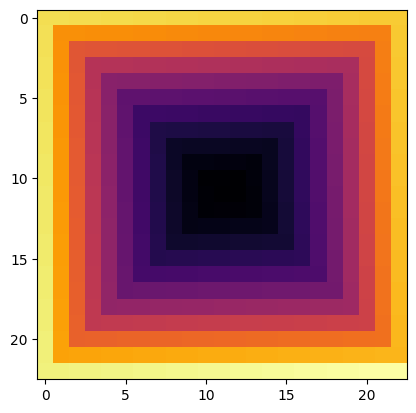

In [19]:
import h5py
import matplotlib.pyplot as plt

with h5py.File("spiral_hdf5.h5", "r") as hdf5_file:
    spiral = hdf5_file["spiral"][:]

plt.imshow(spiral, cmap='inferno')
plt.show()

## Část 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
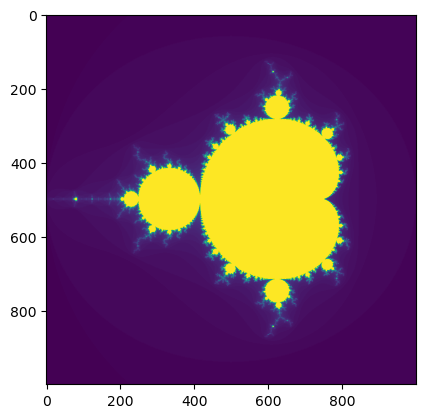

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [21]:
def mandelbrot_set(x_min=-2, x_max=1, y_min=-1.5, y_max=1.5, n=1000, k=100):
    x = np.linspace(x_min, x_max, n)
    y = np.linspace(y_min, y_max, n)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y

    Z = np.zeros(C.shape, dtype=complex)
    B = np.full(C.shape, True, dtype=bool)
    I = np.full(C.shape, 0, dtype=int)

    for i in range(k):
        Z[B] = Z[B] * Z[B] + C[B]
        B[np.abs(Z) > 2] = False
        I[B] = i
    
    return I

Trošičku jsem vykradl a upravil dle https://tomroelandts.com/articles/how-to-compute-the-mandelbrot-set-using-numpy-array-operations

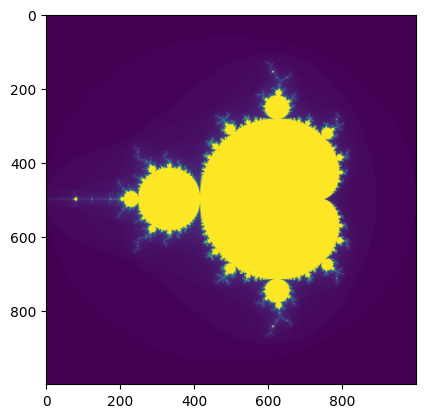

In [23]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)
plt.show()

# Bonus
1. Vykreslete také Juliovu množinu (viz. https://en.wikipedia.org/wiki/Julia_set)
2. Použijte váš kód pro číselnou spirálu a vytvořte obrázek prvočíselné spirály (viz. https://en.wikipedia.org/wiki/Ulam_spiral). Stačí vytvořit matici kde 